# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

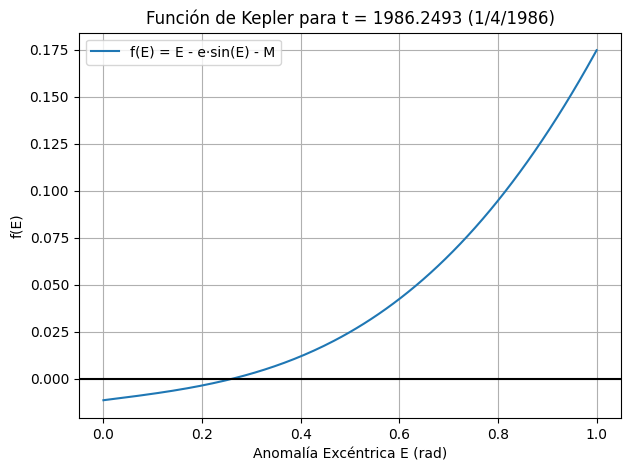

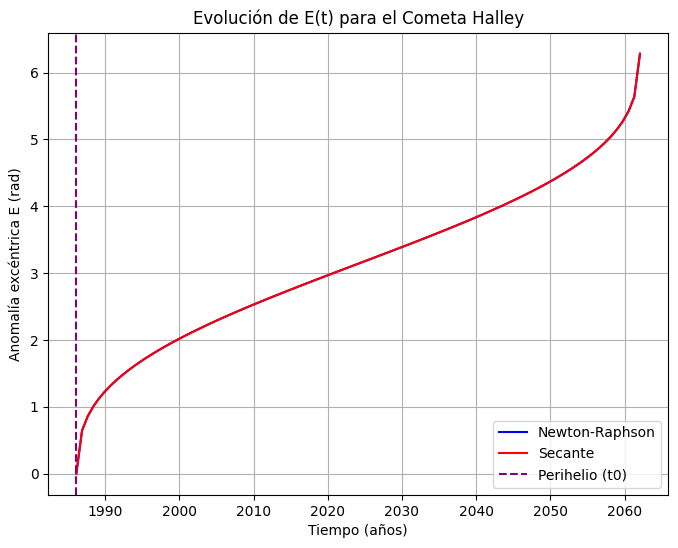

Máxima diferencia entre Newton y Secante: 1.3046197455679476e-10 rad


In [2]:
# Parámetros del Cometa Halley
e = 0.9672671  # Excentricidad
T = 75.96000   # Periodo orbital en años
t0 = 1986.1113 # Tiempo de paso por el perihelio (9 feb 1986)

# 1 de abril de 1986
t_abril1 = 1986 + (31 + 28 + 31 + 1) / 365

# Función de Kepler
def kepler(E, M):
    return E - e * np.sin(E) - M

# Derivada (Newton-Raphson)
def kepler_prime(E, M):
    return 1 - e * np.cos(E)

# Anomalía media 
def anomalia_media(t):
    return (2 * np.pi / T) * (t - t0)

# Resolver E para el 1 de abril de 1986
M_abril1 = anomalia_media(t_abril1)

# Solución con Newton
E_abril1 = newton(kepler, x0=M_abril1, fprime=kepler_prime, args=(M_abril1,), tol=1e-10)

# Método de la Secante
def solve_secant(M, E0, E1, tol=1e-10, max_iter=100):
  for i in range(max_iter):
    f_E0 = kepler(E0, M)
    f_E1 = kepler(E1, M)
    
    if abs(f_E1) < tol:
      return E1
    
    E_new = E1 - f_E1 * (E1 - E0) / (f_E1 - f_E0)
    E0, E1 = E1, E_new
  return E1

# Gráfica de f(E) para E ∈ [0, 1]
E_values = np.linspace(0, 1, 200)
f_values = kepler(E_values, M_abril1)

plt.figure(figsize=(7, 5))
plt.plot(E_values, f_values, label='f(E) = E - e·sin(E) - M')
plt.axhline(0, color='black')
plt.xlabel('Anomalía Excéntrica E (rad)')
plt.ylabel('f(E)')
plt.title(f'Función de Kepler para t = {t_abril1:.4f} (1/4/1986)')
plt.legend()
plt.grid()
plt.show()

# Solución E(t) para un periodo completo
puntos = 100
t_values = np.linspace(t0, t0 + T, puntos)
M_values = anomalia_media(t_values)

# Arrays para almacenar soluciones
E_newton = np.zeros(puntos)
E_secant = np.zeros(puntos)


# Resolver para cada t_i
for i in range(puntos):
  M = M_values[i]
  
  # Método de Newton
  if i == 0:
    E_newton[i] = 0.0  # Condición inicial E(t0) = 0
  else:
    # Suposición inicial inteligente
    E_guess = E_newton[i-1] + (M - M_values[i-1]) / (1 - e * np.cos(E_newton[i-1]))
    E_newton[i] = newton(kepler, E_guess, fprime=kepler_prime, args=(M,), tol=1e-10)
  
  # Método de la Secante
  if i == 0:
    E_secant[i] = 0.0  # Condición inicial
  elif i == 1:
    E0, E1 = 0.0, M_values[1]  # Segundo punto inicial
    E_secant[i] = solve_secant(M, E0, E1)
  else:
    E0, E1 = E_secant[i-2], E_secant[i-1]  # Usa los dos últimos puntos
    E_secant[i] = solve_secant(M, E0, E1)

# Gráfica E(t) para ambos métodos
plt.figure(figsize=(8, 6))
plt.plot(t_values, E_newton, color='blue', label='Newton-Raphson')
plt.plot(t_values, E_secant, color='red', label='Secante')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E (rad)')
plt.title('Evolución de E(t) para el Cometa Halley')
plt.axvline(x=t0, color='purple', linestyle='--', label='Perihelio (t0)')
plt.grid()
plt.legend()
plt.show()

# Diferencia entre métodos (para verificar precisión)
diferencia = np.abs(E_newton - E_secant)
print(f"Máxima diferencia entre Newton y Secante: {np.max(diferencia)} rad") # Diferencia tan pequeña que no se visualiza en la gráfica

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Resultados para T = 0.5:
Newton-Raphson: 0.9575
Método Secante: 0.9575
Punto Fijo:     0.9575


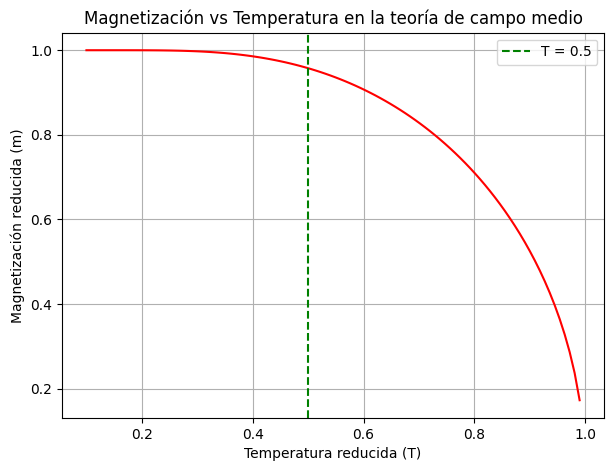

In [3]:
# Definición de la función de magnetización
def magnetizacion(m, T):
  return m - np.tanh(m / T)

# Derivada para Newton-Raphson
def derivada(m, T):
  return 1 - (1 / T) * (1 / np.cosh(m / T))**2

# Método de punto fijo
def punto_fijo(T, m0=1.0, tol=1e-6, max_iter=100):
  m = m0
  for i in range(max_iter):
    m_new = np.tanh(m / T)
    if np.abs(m_new - m) < tol:
      return m_new
    m = m_new
  return m

# Parámetro dado
T_dado = 0.5

# Solución con Newton-Raphson
m_newton = newton(magnetizacion, x0=1.0, fprime=derivada, args=(T_dado,), tol=1e-6)

# Solución con método de la secante (usando scipy)
m_secant = newton(magnetizacion, x0=1.0, args=(T_dado,), tol=1e-6)

# Solución con punto fijo
m_fixed = punto_fijo(T_dado)

print(f"Resultados para T = {T_dado}:")
print(f"Newton-Raphson: {m_newton:.4f}")
print(f"Método Secante: {m_secant:.4f}")
print(f"Punto Fijo:     {m_fixed:.4f}")

# Gráfica para rango de temperaturas
T_values = np.linspace(0.1, 0.99, 100)
m_values = np.zeros_like(T_values)

for i, T in enumerate(T_values):
  m_values[i] = newton(magnetizacion, x0=1.0, args=(T,), tol=1e-6)

plt.figure(figsize=(7, 5))
plt.plot(T_values, m_values, 'r-')
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Magnetización vs Temperatura en la teoría de campo medio')
plt.grid()
plt.axvline(x=T_dado, color='g', linestyle='--', label=f'T = {T_dado}')
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [5]:
# Parámetros
R = 8.314  # J/(mol·K)
T0 = 4.444  # K
G_target = -1e5  # J

# Definición de la ecuación
def f(T):
    return -R * T * (5/2) * np.log(T / T0) - G_target

# Derivada
def f_derivada(T):
    return -R * (5/2) * (np.log(T / T0) + 1)

# Solución
T_final = newton(f, x0=1000, fprime=f_derivada, tol=1e-6)
print(f"La temperatura T para G = -10^5 J es: {T_final:.2f} K")

La temperatura T para G = -10^5 J es: 904.97 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

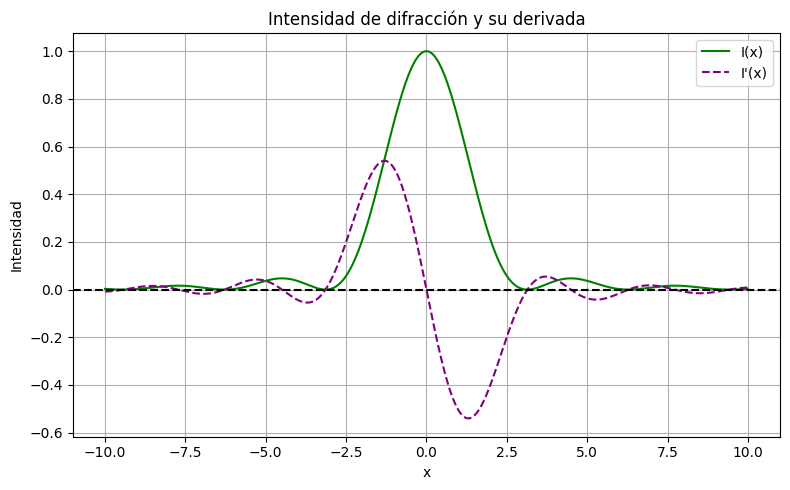

x_1/2 aprox 1.391557, I(x_1/2) ≈ 0.500000

Máximos locales x_i en [-10, 10] donde I'(x) = 0:
x_0 ≈ -9.42478; I(x) ≈ 1.0108231630127611e-21
x_1 ≈ -7.72525; I(x) ≈ 0.01648002599297394
x_2 ≈ -6.28319; I(x) ≈ 1.2398172452193715e-20
x_3 ≈ -4.49341; I(x) ≈ 0.04719044922581128
x_4 ≈ -3.14159; I(x) ≈ 7.999435204027839e-21
x_5 ≈ 3.14159; I(x) ≈ 7.999435204027839e-21
x_6 ≈ 4.49341; I(x) ≈ 0.04719044922581128
x_7 ≈ 6.28319; I(x) ≈ 1.2398140972615501e-20
x_8 ≈ 7.72525; I(x) ≈ 0.01648002599297394
x_9 ≈ 9.42478; I(x) ≈ 1.0108231630127611e-21


In [9]:
# Funciones de I(x) y su derivada I'(x)
def I(x):
  x = np.asarray(x)
  return np.where(x == 0, 1.0, (np.sin(x) / x)**2)

def I_prima(x):
  x = np.asarray(x)
  result = np.zeros_like(x)
  nozero = x != 0
  result[nozero] = (2 / x[nozero]) * (np.cos(x[nozero]) - np.sin(x[nozero]) / x[nozero]) * (np.sin(x[nozero]) / x[nozero])
  return result if result.size > 1 else result.item()

# Graficar I(x) e I'(x)
x_vals = np.linspace(-10, 10, 1000)
I_vals = I(x_vals)
I_prima_vals = I_prima(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, I_vals, label=r'I(x)', color='green')
plt.plot(x_vals, I_prima_vals, '--', label=r"I'(x)", color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Intensidad de difracción y su derivada')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


# Método de secante para I(x) - 0.5 = 0
def secante(f, x0, x1, tol=1e-10, max_iter=100):
  for n in range(max_iter):
    fx0 = f(x0)
    fx1 = f(x1)
    if fx1 - fx0 == 0:
      return None
    x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
    if abs(f(x2)) < tol:
      return x2
    x0, x1 = x1, x2
  return None

# Aplicamos para I(x) - 0.5 = 0
def f_half(x):
  return I(x) - 0.5

x_half = secante(f_half, x0=1.5, x1=3.0)

if x_half:
  print(f"x_1/2 aprox {x_half:.6f}, I(x_1/2) ≈ {I(x_half):.6f}")
else:
  print("No se encontró x_1/2 con el método de la secante.")


# método de la regula falsi para I'(x) = 0 (máximos locales)
def regula_falsi(f, a, b, tol=1e-10, max_iter=100):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return None
    for n in range(max_iter):
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return None

# Buscar raíces en [-10, 10] usando pasos de h = 0.5
h = 0.5
raices = []
x_range = np.arange(-10, 10, h)

for i in range(len(x_range) - 1):
    a, b = x_range[i], x_range[i+1]
    fa, fb = I_prima(a), I_prima(b)
    if fa * fb < 0:
        raiz = regula_falsi(I_prima, a, b)
        if raiz is not None:
            if not any(np.isclose(raiz, r, atol=1e-6) for r in raices):
                raices.append(raiz)

raices = sorted(raices)
print("\nMáximos locales x_i en [-10, 10] donde I'(x) = 0:")
for i, r in enumerate(raices):
  print(f"x_{i} ≈ {r:.5f}; I(x) ≈ {I(r)}")

# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

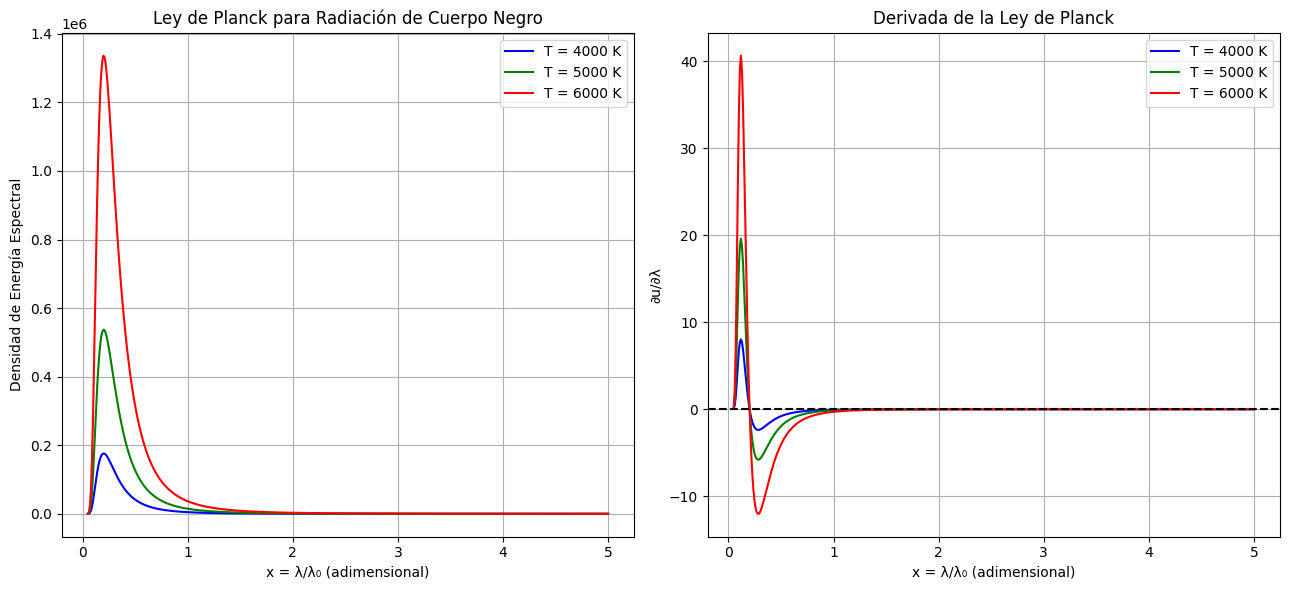


Verificación de la Ley de Wien:
Valor calculado λ_max·T = 2.89708e-03 m·K
Valor teórico = 2.8978e-03 m·K
Diferencia = 7.22e-07 m·K


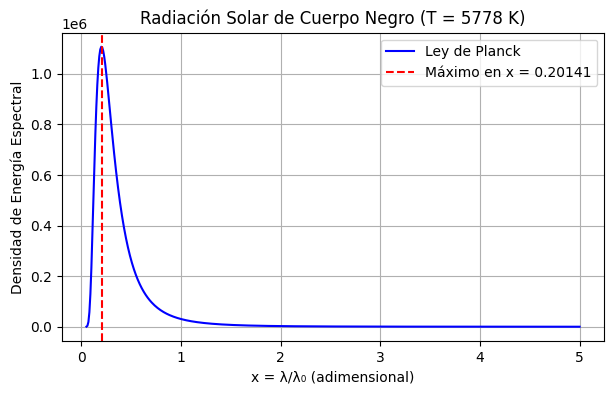


Resultados para la Temperatura Solar (5778 K):
Método de Bisección: x_max = 0.20141, λ_max = 5.014e-07 m
Método de Newton:    x_max = 0.20141, λ_max = 5.014e-07 m


In [13]:
# Constantes físicas
h = 6.626e-34 # Constante de Planck (J·s)
kB = 1.381e-23 # Constante de Boltzmann (J/K)
c = 2.998e8 # Velocidad de la luz (m/s)
eV_a_J = 1.60218e-19 # Factor de conversión de electrón-voltios a Joules

# 1. Implementación robusta de la Ley de Planck
def ley_planck_adimensional(x, T):
    '''
    Ley de Planck en forma adimensional con protección numérica
    x : lambda/lambda_0 (adimensional)
    T : Temperatura (K)
    '''
    with np.errstate(all='ignore'): # Ignorar advertencias numéricas
        lambda0 = h*c/(kB*T) # Longitud de onda característica
        K = 8*np.pi*kB*T/lambda0**4 # Factor de normalización
        # Manejo especial para valores pequeños de x
        return np.where(np.abs(x) < 1e-10, 0.0, K / (x**5 * (np.exp(1/x) - 1)))

def derivada_planck(x, T):
    '''
    Derivada de la Ley de Planck con protección contra singularidades
    '''
    with np.errstate(all='ignore'):
        lambda0 = h*c/(kB*T)
        K = 8*np.pi*kB*T/lambda0**4
        termino = 1/x
        exp_termino = np.exp(termino)
        numerador = 5*x + (1 - 5*x)*exp_termino
        denominador = x**7 * (exp_termino - 1)**2
        return np.where(np.abs(x) < 1e-10, 0.0, K * lambda0 * numerador / denominador)

# 2. Gráficas para diferentes temperaturas
def graficar_funciones_planck():
    temperaturas = [4000, 5000, 6000]  # Temperaturas en Kelvin
    colores = ['blue', 'green', 'red']
    x = np.linspace(0.05, 5, 500)  # Rango adimensional x = λ/λ₀
    
    plt.figure(figsize=(13, 6))
    
    # Gráfico de la Ley de Planck
    plt.subplot(1, 2, 1)
    for T, color in zip(temperaturas, colores):
        u = ley_planck_adimensional(x, T)
        plt.plot(x, u, color=color, label=f'T = {T} K')
    plt.title('Ley de Planck para Radiación de Cuerpo Negro')
    plt.xlabel('x = λ/λ₀ (adimensional)')
    plt.ylabel('Densidad de Energía Espectral')
    plt.legend()
    plt.grid()
    
    # Gráfico de la derivada
    plt.subplot(1, 2, 2)
    for T, color in zip(temperaturas, colores):
        du = derivada_planck(x, T)
        plt.plot(x, du, color=color, label=f'T = {T} K')
    plt.title('Derivada de la Ley de Planck')
    plt.xlabel('x = λ/λ₀ (adimensional)')
    plt.ylabel('∂u/∂λ')
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# 3. Cálculo del máximo para la temperatura solar
def calcular_maximo_solar():
    T_sol = 5778  # Temperatura superficial del Sol (K)
    lambda0_sol = h*c/(kB*T_sol)  # Longitud de onda característica
    
    # Método de bisección (el más robusto)
    try:
        x_max_biseccion = bisect(lambda x: derivada_planck(x, T_sol), 0.15, 0.3, xtol=1e-10)
        lambda_max_biseccion = x_max_biseccion * lambda0_sol
    except ValueError:
        x_max_biseccion, lambda_max_biseccion = np.nan, np.nan
    
    # Método de Newton mejorado
    def f(x):
        return derivada_planck(x, T_sol)
    
    def f_prima(x):
        # Paso adaptativo para la derivada numérica
        h = max(1e-6, 1e-6*abs(x))
        return (f(x + h) - f(x - h))/(2*h)
    
    try:
        # Usamos el resultado de bisección como valor inicial si está disponible
        x0 = 0.2 if np.isnan(x_max_biseccion) else x_max_biseccion
        x_max_newton = newton(f, x0=x0, fprime=f_prima, tol=1e-10, maxiter=100)
        lambda_max_newton = x_max_newton * lambda0_sol
    except RuntimeError:
        x_max_newton, lambda_max_newton = np.nan, np.nan
    
    # Verificación de la Ley de Desplazamiento de Wien
    if not np.isnan(lambda_max_biseccion):
        constante_wien = lambda_max_biseccion * T_sol
        print(f"\nVerificación de la Ley de Wien:")
        print(f"Valor calculado λ_max·T = {constante_wien:.5e} m·K")
        print(f"Valor teórico = 2.8978e-03 m·K")
        print(f"Diferencia = {abs(constante_wien - 2.8978e-3):.2e} m·K")
    
    # Gráfico del resultado final
    plt.figure(figsize=(7, 4))
    x = np.linspace(0.05, 5, 500)
    u = ley_planck_adimensional(x, T_sol)
    plt.plot(x, u, 'b-', label='Ley de Planck')
    if not np.isnan(x_max_biseccion):
        plt.axvline(x_max_biseccion, color='r', linestyle='--', 
                   label=f'Máximo en x = {x_max_biseccion:.5f}')
    plt.title(f'Radiación Solar de Cuerpo Negro (T = {T_sol} K)')
    plt.xlabel('x = λ/λ₀ (adimensional)')
    plt.ylabel('Densidad de Energía Espectral')
    plt.legend()
    plt.grid()
    plt.show()
    
    return (x_max_biseccion, lambda_max_biseccion), (x_max_newton, lambda_max_newton)

# Ejecutar el análisis completo
graficar_funciones_planck()
resultado_biseccion, resultado_newton = calcular_maximo_solar()

# Mostrar resultados numéricos
print("\nResultados para la Temperatura Solar (5778 K):")
print(f"Método de Bisección: x_max = {resultado_biseccion[0]:.5f}, λ_max = {resultado_biseccion[1]:.3e} m")
print(f"Método de Newton:    x_max = {resultado_newton[0]:.5f}, λ_max = {resultado_newton[1]:.3e} m")

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

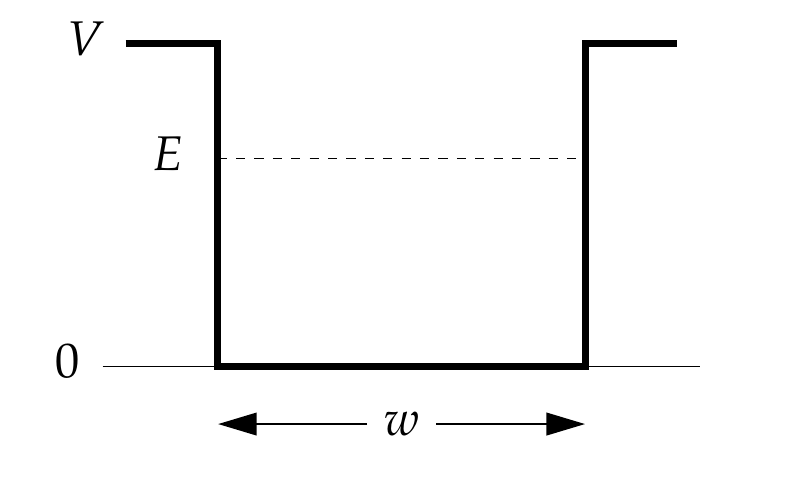

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} = 
\begin{cases} 
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

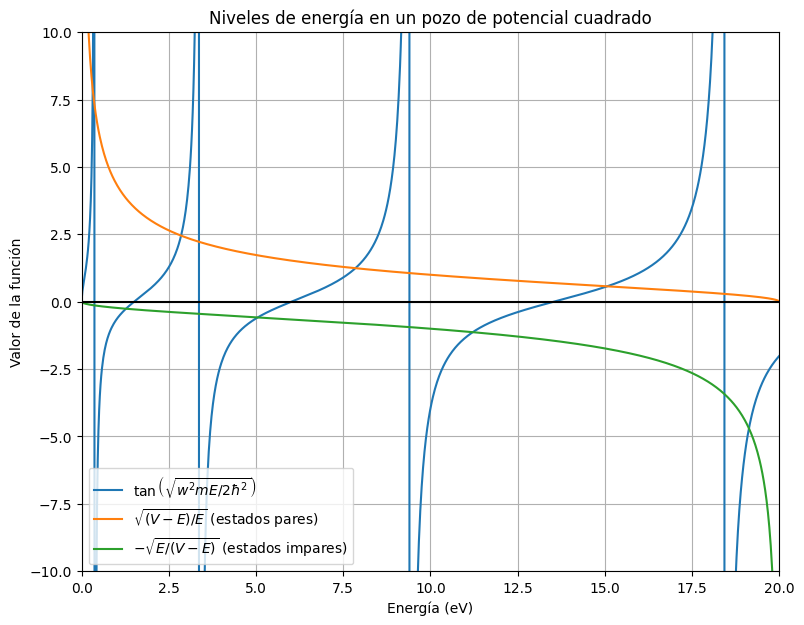

No se pudo encontrar solución para el nivel 2 en el rango (4.0, 7.0)
No se pudo encontrar solución para el nivel 4 en el rango (11.0, 15.0)

Primeros seis niveles de energía (eV):
Nivel 0: 0.318 eV
Nivel 1: 3.384 eV
Nivel 2: No encontrado
Nivel 3: 9.400 eV
Nivel 4: No encontrado
Nivel 5: 18.424 eV


In [15]:
# Constantes físicas
hbar = 1.0545718e-34 # J·s
m_e = 9.11e-31 # kg (masa del electrón)
eV_to_J = 1.60218e-19 # Conversión eV a Joules

# Parámetros del pozo
V_eV = 20             # eV
w = 1e-9              # m (1 nm)
V = V_eV * eV_to_J    # Convertir a Joules

# Función para graficar
def plot_functions():
    E_vals_eV = np.linspace(0.001, 19.999, 1000)  # eV
    E_vals = E_vals_eV * eV_to_J                  # Convertir a Joules
    
    # Calcular las tres funciones
    y1 = np.tan(np.sqrt(w**2 * m_e * E_vals / (2 * hbar**2)))
    y2 = np.sqrt((V - E_vals)/E_vals)
    y3 = -np.sqrt(E_vals/(V - E_vals))
    
    # Graficar
    plt.figure(figsize=(9, 7))
    plt.plot(E_vals_eV, y1, label=r'$\tan\left(\sqrt{w^2 m E / 2 \hbar^2}\right)$')
    plt.plot(E_vals_eV, y2, label=r'$\sqrt{(V-E)/E}$ (estados pares)')
    plt.plot(E_vals_eV, y3, label=r'$-\sqrt{E/(V-E)}$ (estados impares)')
    plt.ylim(-10, 10)
    plt.xlim(0, 20)
    plt.axhline(0, color='black')
    plt.title('Niveles de energía en un pozo de potencial cuadrado')
    plt.xlabel('Energía (eV)')
    plt.ylabel('Valor de la función')
    plt.legend()
    plt.grid()
    plt.show()

# Función para encontrar niveles de energía
def calculate_energy_levels():
    # Definir las ecuaciones para estados pares e impares
    def even_equation(E):
        k = np.sqrt(2 * m_e * E * eV_to_J) / hbar
        return np.tan(k * w / 2) - np.sqrt((V_eV - E) / E)
    
    def odd_equation(E):
        k = np.sqrt(2 * m_e * E * eV_to_J) / hbar
        return np.tan(k * w / 2) + np.sqrt(E / (V_eV - E))
    
    # Calcular los primeros 6 niveles
    levels = []
    
    # Rangos de energía ajustados para garantizar cambio de signo
    energy_ranges = [
        (0.1, 1.5),     # Nivel 0 (par)
        (1.5, 4.0),     # Nivel 1 (impar)
        (4.0, 7.0),     # Nivel 2 (par)
        (7.0, 11.0),    # Nivel 3 (impar)
        (11.0, 15.0),   # Nivel 4 (par)
        (15.0, 19.9)    # Nivel 5 (impar)
    ]
    
    for i, (E_min, E_max) in enumerate(energy_ranges):
        if i % 2 == 0:  # Estados pares (0, 2, 4)
            f = even_equation
        else:           # Estados impares (1, 3, 5)
            f = odd_equation
        
        # Verificar que hay cambio de signo
        if f(E_min) * f(E_max) > 0:
            # Ajustar automáticamente el rango si no hay cambio de signo
            E_test = np.linspace(E_min, E_max, 100)
            for j in range(len(E_test)-1):
                if f(E_test[j]) * f(E_test[j+1]) < 0:
                    E_min, E_max = E_test[j], E_test[j+1]
                    break
        
        try:
            E = bisect(f, E_min, E_max, rtol=0.001/20)
            levels.append(E)
        except ValueError:
            print(f"No se pudo encontrar solución para el nivel {i} en el rango ({E_min}, {E_max})")
            levels.append(np.nan)
    
    return levels

# Ejecutar las funciones
plot_functions()
energy_levels = calculate_energy_levels()

# Mostrar resultados
print("\nPrimeros seis niveles de energía (eV):")
for i, E in enumerate(energy_levels):
    if not np.isnan(E):
        print(f"Nivel {i}: {E:.3f} eV")
    else:
        print(f"Nivel {i}: No encontrado")

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [ ]:
# Constantes físicas
G = 6.674e-11 # Constante gravitacional (m^3 kg^-1 s^-2)
M = 5.974e24 # Masa de la Tierra (kg)
m = 7.348e22 # Masa de la Luna (kg)
R = 3.844e8 # Distancia Tierra-Luna (m)
ω = 2.662e-6 # Velocidad angular (s^-2)

# Definición de la ecuación L₁
def ecuacion_L1(r):
    return G*M/r**2 - G*m/(R-r)**2 - ω**2*r

# Derivada de la ecuación
def derivada_L1(r):
    return -2*G*M/r**3 - 2*G*m/(R-r)**3 - ω**2

# Valor inicial (85% de la distancia Tierra-Luna, cerca de donde se espera L₁)
r_guess = 0.85 * R

# Resolución con Newton-Raphson
r_L1 = newton(ecuacion_L1, r_guess, fprime=derivada_L1, tol=1e-6, maxiter=100)

# Cálculo de distancias relevantes
distancia_Tierra_km = r_L1 / 1000
distancia_Luna_km = (R - r_L1) / 1000
porcentaje = (r_L1 / R) * 100

# Resultados
print("Cálculo del punto de Lagrange L₁:")
print(f"Distancia desde la Tierra: {distancia_Tierra_km:,.0f} km")
print(f"Distancia hasta la Luna:   {distancia_Luna_km:,.0f} km")
print(f"Porcentaje del camino:     {porcentaje:.2f}%")